In [1]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from matplotlib.pylab import plt


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from statsmodels.tsa.ar_model import AutoReg

In [3]:
fileE = "Data/ExcessWind.csv" 
df = pd.read_csv(fileE, parse_dates=[1], na_values=" ")

In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'Year', 'Month', 'Hour', 'rain_BEL', 'temp_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL', 'wdsp_BEL',
       'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB', 'dewpt_DUB',
       'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB', 'wddir_DUB', 'ww_DUB',
       'w_DUB', 'sun_DUB', 'vis_DUB', 'clht_DUB', 'clamt_DUB', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'rain_COR', 'temp_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'wdsp_COR',
       'wddir_COR', 'ww_COR', 'w_COR', 'sun_COR', 'vis_COR', 'clht_COR',
       'clamt_COR', 'rain_MAL', 'temp_MAL', 'wetb_MAL', 'dewpt_MAL',
       'vappr_MAL', 'rhum_MAL', 'msl_MAL', 'wdsp_MAL', 'wddir_MAL',
       'ActualDemandMW', 'ActualWindMW', 'ActualGenerationMW',
       'RatioWindDemand', 'ExcessWind'],
      dtype='object')

In [5]:
df.wdsp.isnull().sum()

0

In [6]:
#Determine rolling statistics
rolmean = df["ActualWindMW"].rolling(window=100).mean()
rolstd = df["ActualWindMW"].rolling(window=100).std()
print(rolmean, rolstd)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
46027    1585.3950
46028    1585.1450
46029    1583.8625
46030    1583.0500
46031    1580.5250
Name: ActualWindMW, Length: 46032, dtype: float64 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
46027    810.360070
46028    810.042472
46029    808.444258
46030    807.635100
46031    805.458798
Name: ActualWindMW, Length: 46032, dtype: float64


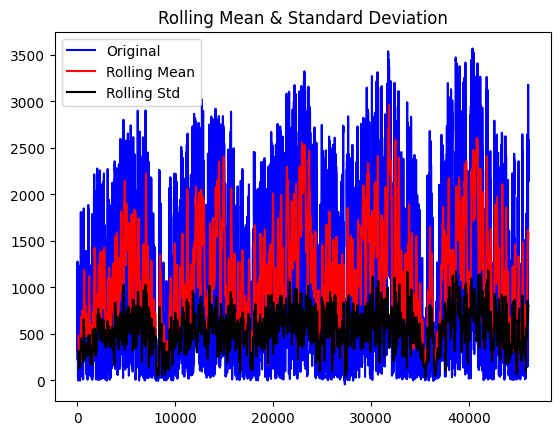

In [7]:
#Plot rolling statistics
orig = plt.plot(df["ActualWindMW"], color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
print('Shape of data',df.shape)
print('Original dataset',df.head())
print('After extracting only AR attribute',df["ActualWindMW"])

Shape of data (46032, 73)
Original dataset    Unnamed: 0                date  Year Month  Hour  rain_BEL  temp_BEL  \
0           0 2017-07-01 00:00:00  2017   Jul  0:00       0.0      12.3   
1           1 2017-07-01 01:00:00  2017   Jul  1:00       0.0      12.5   
2           2 2017-07-01 02:00:00  2017   Jul  2:00       0.0      13.0   
3           3 2017-07-01 03:00:00  2017   Jul  3:00       0.0      12.9   
4           4 2017-07-01 04:00:00  2017   Jul  4:00       0.0      13.3   

   wetb_BEL  dewpt_BEL  vappr_BEL  ...  vappr_MAL  rhum_MAL  msl_MAL  \
0      11.3       10.3       12.5  ...       10.2        84   1016.8   
1      11.4       10.4       12.6  ...       10.3        84   1016.2   
2      11.9       10.9       13.0  ...       10.9        88   1015.8   
3      12.0       11.2       13.3  ...       10.1        89   1015.4   
4      12.7       12.2       14.2  ...       10.0        89   1015.2   

   wdsp_MAL  wddir_MAL  ActualDemandMW  ActualWindMW  ActualGenerationMW 

<AxesSubplot: >

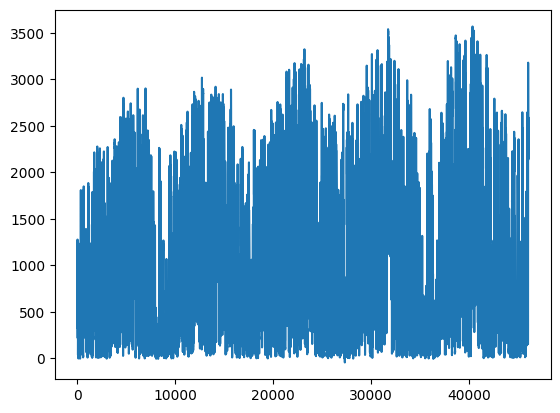

In [9]:
df["ActualWindMW"].plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-fuller Test: ")
dftest = adfuller(df["ActualWindMW"], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)
    

Results of Dickey-fuller Test: 
Test Statistics               -1.749899e+01
p-value                        4.395775e-30
#Lags Used                     5.000000e+01
Number of Observations Used    4.598100e+04
Critical value (1%)           -3.430492e+00
Critical value (5%)           -2.861603e+00
Critical value (10%)          -2.566803e+00
dtype: float64


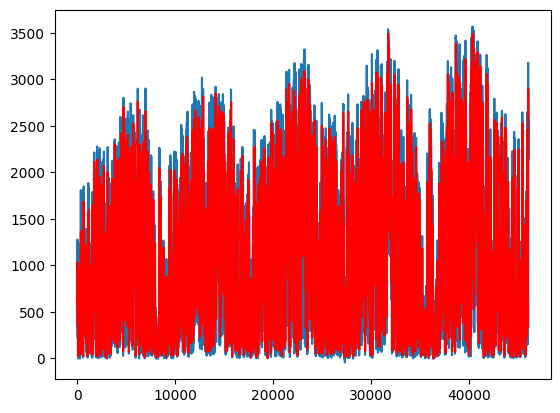

In [11]:
movingAverage = df["ActualWindMW"].rolling(window=12).mean()
movingSTD = df["ActualWindMW"].rolling(window=12).std()
plt.plot(df["ActualWindMW"])
plt.plot(movingAverage, color='red')

In [12]:
df["ActualWindMW"].index

RangeIndex(start=0, stop=46032, step=1)

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingaverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Performing Dickey-fuller Test
    print("Results of Dickey-fuller Test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

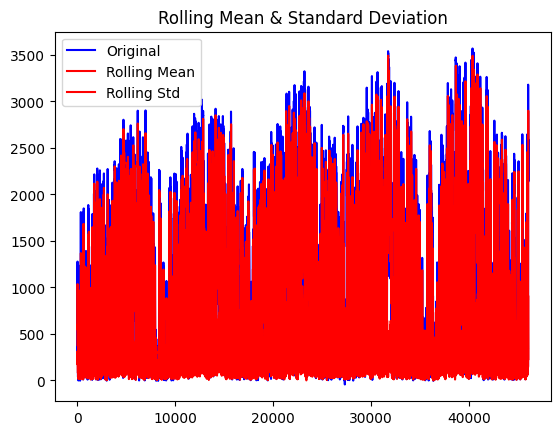

Results of Dickey-fuller Test: 
Test Statistics               -1.749899e+01
p-value                        4.395775e-30
#Lags Used                     5.000000e+01
Number of Observations Used    4.598100e+04
Critical value (1%)           -3.430492e+00
Critical value (5%)           -2.861603e+00
Critical value (10%)          -2.566803e+00
dtype: float64


In [20]:
test_stationarity(df["ActualWindMW"])

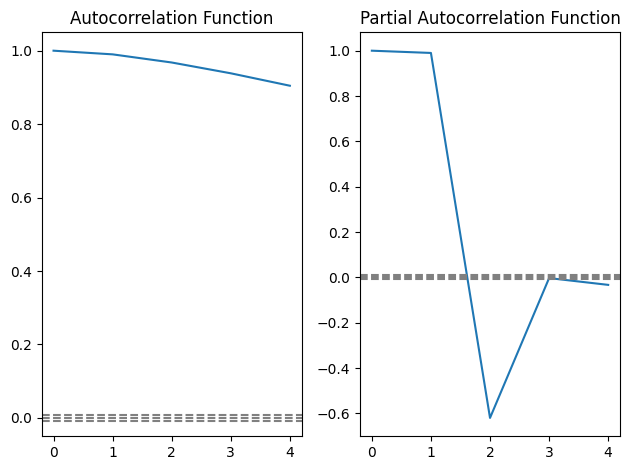

In [27]:
from statsmodels.tsa.stattools import pacf,acf

lag_acf = acf(df["ActualWindMW"], nlags=4)
lag_pacf = pacf(df["ActualWindMW"], nlags=4,method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["ActualWindMW"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["ActualWindMW"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["ActualWindMW"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["ActualWindMW"])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

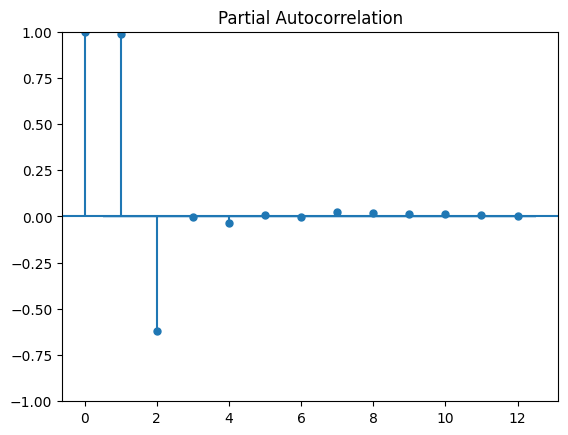

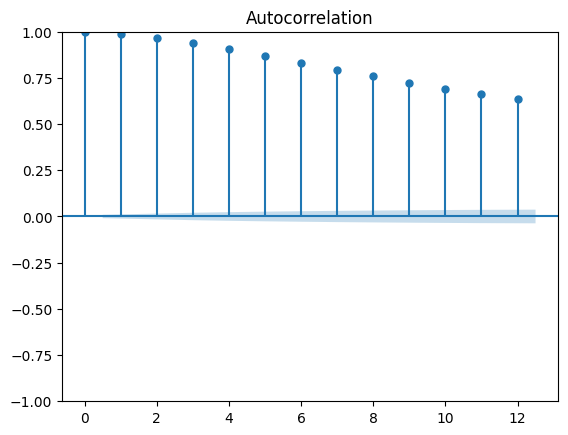

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['ActualWindMW'],lags=12, alpha=0.05)
acf=plot_acf(df['ActualWindMW'],lags=12)

from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
model = ARIMA(df["ActualWindMW"], order=(2,1,0))
results_AR = model.fit()

plt.plot(df["ActualWindMW"])
plt.plot(results_AR.fittedvalues, color='red')
print('Plotting AR model')

print("Residual mean of squares (MSE): %.2f" % np.mean((results_AR.fittedvalues - df["ActualWindMW"]) ** 2))
print("RSS: %.4f" % sum((results_AR.fittedvalues - df["ActualWindMW"]) ** 2))

## Actual Demand

In [17]:
#Determine rolling statistics
rolmean = df["ActualDemandMW"].rolling(window=100).mean()
rolstd = df["ActualDemandMW"].rolling(window=100).std()
print(rolmean, rolstd)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
46027    3599.7175
46028    3599.6000
46029    3595.3600
46030    3588.4150
46031    3578.8600
Name: ActualDemandMW, Length: 46032, dtype: float64 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
46027    535.645559
46028    535.568009
46029    533.191526
46030    531.282165
46031    530.839400
Name: ActualDemandMW, Length: 46032, dtype: float64


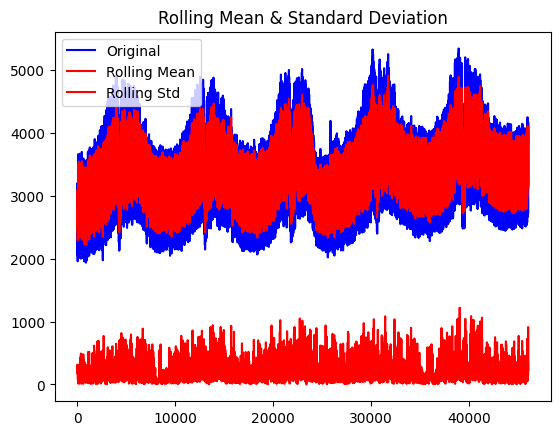

Results of Dickey-fuller Test: 
Test Statistics               -1.312745e+01
p-value                        1.518781e-24
#Lags Used                     5.600000e+01
Number of Observations Used    4.597500e+04
Critical value (1%)           -3.430492e+00
Critical value (5%)           -2.861603e+00
Critical value (10%)          -2.566803e+00
dtype: float64


In [21]:
test_stationarity(df["ActualDemandMW"])

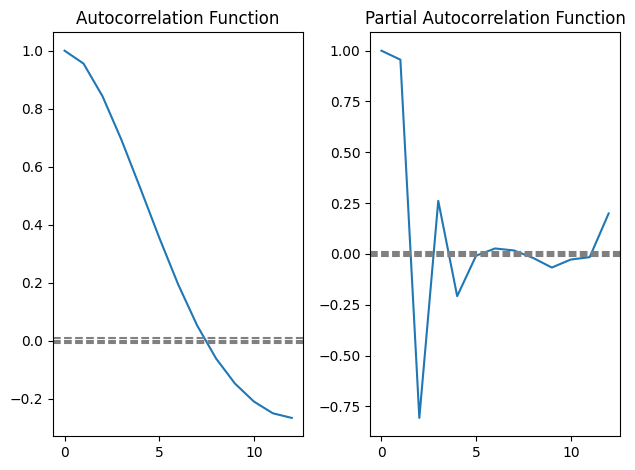

In [22]:
from statsmodels.tsa.stattools import pacf,acf

lag_acf = acf(df["ActualDemandMW"], nlags=12)
lag_pacf = pacf(df["ActualDemandMW"], nlags=12,method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["ActualDemandMW"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["ActualDemandMW"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["ActualDemandMW"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["ActualDemandMW"])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

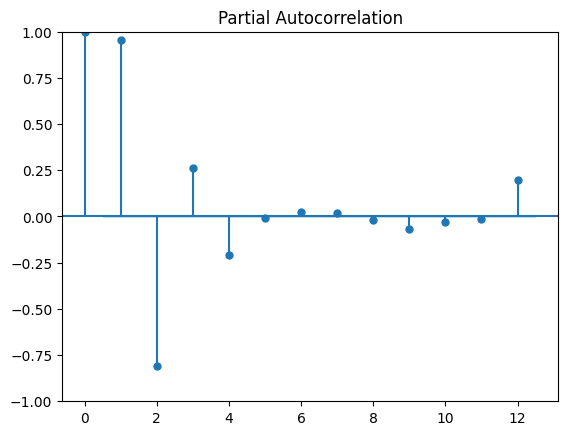

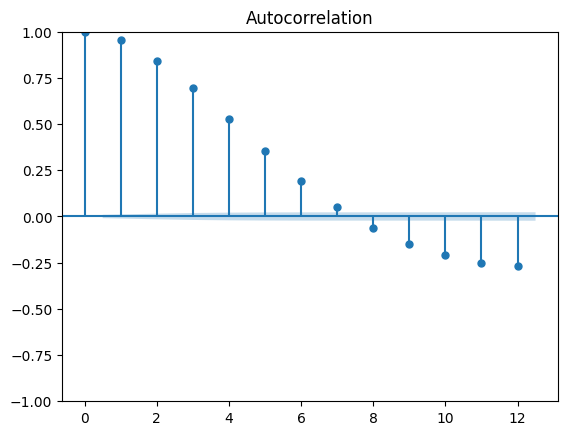

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['ActualDemandMW'],lags=24)
acf=plot_acf(df['ActualDemandMW'],lags=24)

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Plotting AR model


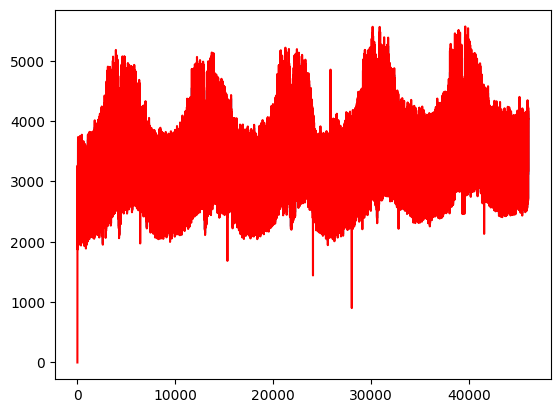

In [30]:
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
model = ARIMA(df["ActualDemandMW"], order=(2,1,6))
results_AR = model.fit()

plt.plot(df["ActualDemandMW"])
plt.plot(results_AR.fittedvalues, color='red')
print('Plotting AR model')

In [31]:
print("Residual mean of squares (MSE): %.2f" % np.mean((results_AR.fittedvalues - df["ActualWindMW"]) ** 2))
print("RSS: %.4f" % sum((results_AR.fittedvalues - df["ActualWindMW"]) ** 2))

Residual mean of squares (MSE): 6136461.82
RSS: 282473610370.6542


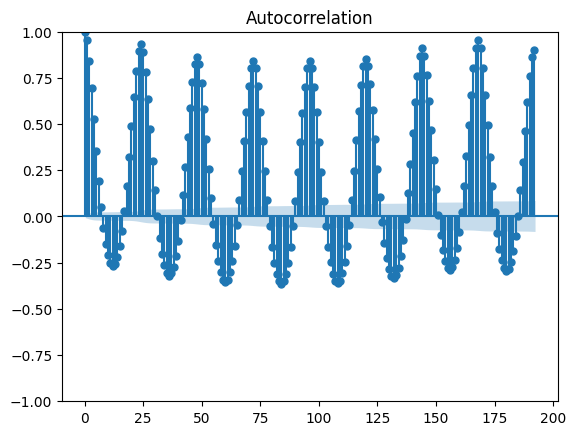

In [43]:
acf=plot_acf(df['ActualDemandMW'],lags=(8*24))

In [33]:
X=df.ActualWindMW
windSpeed=df.wdsp

In [35]:
train=X[:len(X)-24]
windSpeedTrain = windSpeed[:len(X)-24]

test=X[len(X)-24:]
windSpeedTest = windSpeed[len(X)-24:]

In [44]:
model=AutoReg(train, lags=6, exog=windSpeedTrain, old_names=True).fit()

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\ar_model.py:233: FutureWarning:

old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.



In [45]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:                46008
Model:                   AutoReg-X(6)   Log Likelihood             -271799.321
Method:               Conditional MLE   S.D. of innovations             89.076
Date:                Wed, 09 Nov 2022   AIC                         543616.641
Time:                        15:43:54   BIC                         543695.269
Sample:                             6   HQIC                        543641.367
                                46008                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           7.5516      0.848      8.908      0.000       5.890       9.213
ActualWindMW.L1     1.5830      0.005    335.758      0.000       1.574       1.592
ActualWindMW.L2    -0.6310      

In [46]:
pred=model.predict(start=len(train), end=len(X)-1, dynamic=False, exog=windSpeedTrain, exog_oos=windSpeedTest)

In [47]:
len(train),len(X)-1 ,  len(pred)

(46008, 46031, 24)

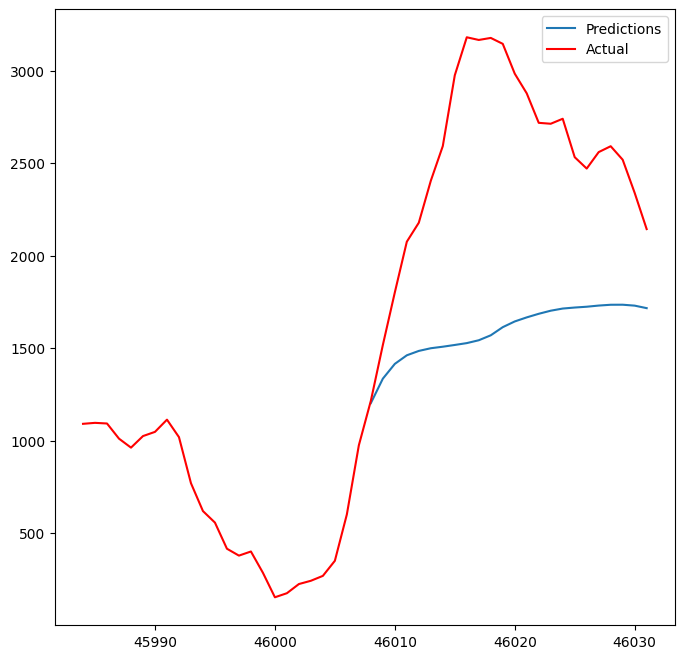

In [48]:
import matplotlib.pyplot as plt

actual=X[len(X)-48:]

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(pred, label="Predictions")
plt.plot(actual,color='red', label="Actual")

plt.legend()
plt.show()

In [49]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("RMSE: ", mean_squared_error(test, pred))
print('MAE:', mean_absolute_error(test, pred))

RMSE:  1069709.535843921
MAE: 934.9544729121208


In [41]:
model.pvalues.loc[model.pvalues > 0.05]

ActualWindMW.L7     0.717054
ActualWindMW.L8     0.568602
ActualWindMW.L9     0.541632
ActualWindMW.L10    0.339968
ActualWindMW.L11    0.335874
dtype: float64

## Persistence Model

The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.

We can develop a test harness for the problem by splitting the observations into training and test sets, with only the last 24 observations in the dataset assigned to the test set as “unseen” data that we wish to predict.

The predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. This means that we are not making a 24-hr forecast, but 24 1-hr forecasts.

Test MSE: 32795.862


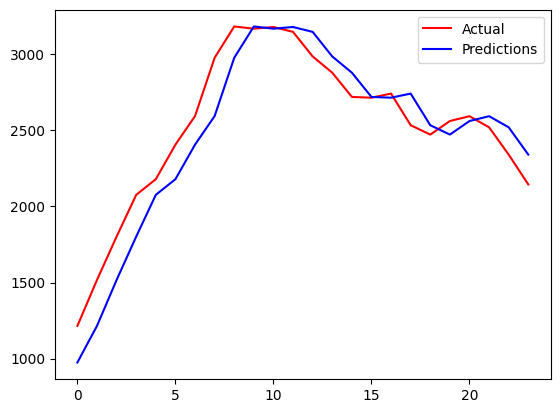

In [114]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
# create lagged dataset
values = DataFrame(df.ActualWindMW.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-24], X[len(X)-24:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y,color='red', label="Actual")
pyplot.plot(predictions, color='blue', label="Predictions")
plt.legend()
pyplot.show()

## Autoregression Model

In [101]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = df.ActualWindMW.values
def testAutoreg(X, testT, nLag, showGraph=False):
    train, test = X[:len(X)-testT], X[len(X)-testT:]
# train autoregression
    model=AutoReg(train,lags=nLag, old_names=True)
    model_fit = model.fit()
    print("Train: " + str(len(train)) + " Test: " + str(len(test)) + " Predict: " + str((len(X) - testT - 1)))
    print('Coefficients: %s' % model_fit.params)
# make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# plot results
    if (showGraph== True):
        fig, ax = plt.subplots(figsize=(8,8))
        pyplot.plot(test,color='red', label="Actual")
        pyplot.plot(predictions, color='blue', label="Predictions")
        plt.legend()
        plt.show()   
    print("RMSE: ", mean_squared_error(test, predictions))
    print('MAE:', mean_absolute_error(test, predictions))
    print('Train r2_score:', r2_score(test, predictions))
    return predictions

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\ar_model.py:233: FutureWarning:

old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.



Train: 46008 Test: 24 Predict: 46007
Coefficients: intercept          17.391594
ActualWindMW.L1     1.603859
ActualWindMW.L2    -0.619992
dtype: float64


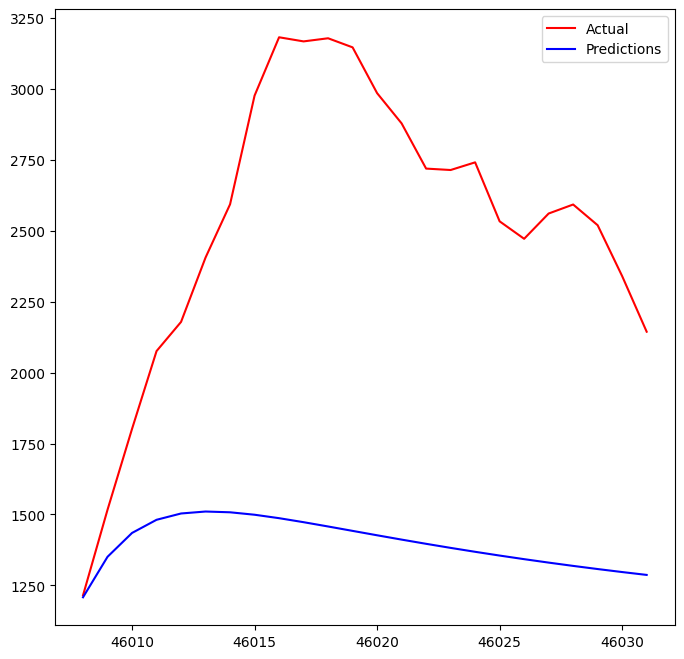

RMSE:  1490433.0355596095
MAE: 1126.5998278324246
Train r2_score: -4.870472989746547


46008    1208.383343
46009    1350.975093
46010    1434.976216
46011    1481.296349
46012    1503.507242
46013    1510.412246
46014    1507.716312
46015    1499.111368
46016    1486.981711
46017    1472.862456
46018    1457.737462
46019    1442.232939
46020    1426.743258
46021    1411.512685
46022    1396.688482
46023    1382.355396
46024    1368.558044
46025    1355.315446
46026    1342.630444
46027    1330.495802
46028    1318.898158
46029    1307.820561
46030    1297.244112
46031    1287.149008
dtype: float64

In [104]:
testAutoreg(c, testT=24, nLag=(2), showGraph=True)

C:\Users\mcuf8\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\ar_model.py:233: FutureWarning:

old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.



Train: 46022 Test: 10 Predict: 46021
Coefficients: intercept          17.449456
ActualWindMW.L1     1.602042
ActualWindMW.L2    -0.614866
ActualWindMW.L3    -0.003349
dtype: float64


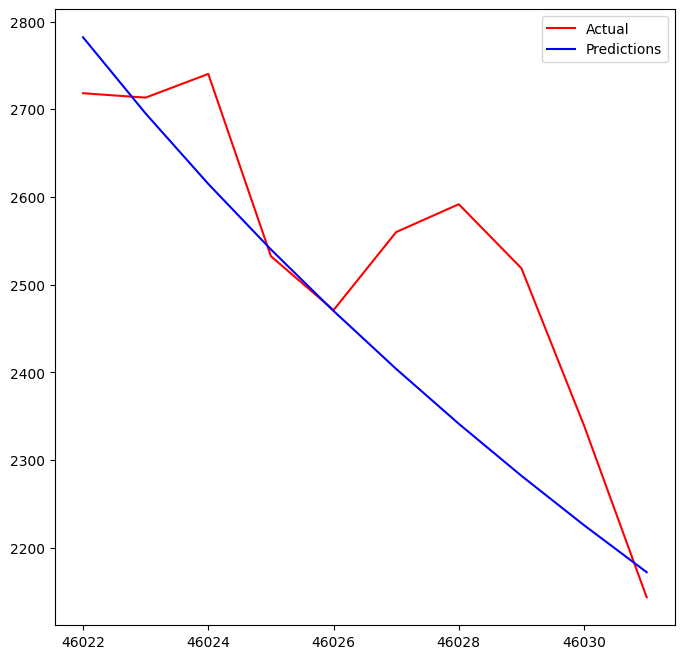

RMSE:  17677.149550043996
MAE: 100.07444510192067
Train r2_score: 0.4240953617933333


46022    2782.031462
46023    2695.110129
46024    2614.915542
46025    2540.205151
46026    2470.116000
46027    2404.035696
46028    2341.517920
46029    2282.227085
46030    2225.902042
46031    2172.332252
dtype: float64

In [109]:
testAutoreg(df.ActualWindMW, testT=10, nLag=(3), showGraph=True)

In [110]:
mod = AutoReg(df.ActualWindMW, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:                46032
Model:                     AutoReg(3)   Log Likelihood             -272242.994
Method:               Conditional MLE   S.D. of innovations             89.627
Date:                Wed, 09 Nov 2022   AIC                         544495.988
Time:                        16:46:16   BIC                         544539.673
Sample:                             3   HQIC                        544509.725
                                46032                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.4515      0.700     24.921      0.000      16.079      18.824
ActualWindMW.L1     1.6020      0.005    343.706      0.000       1.593       1.611
ActualWindMW.L2    -0.6149      

In [111]:
mod = AutoReg(df.ActualDemandMW, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:         ActualDemandMW   No. Observations:                46032
Model:                     AutoReg(3)   Log Likelihood             -279226.542
Method:               Conditional MLE   S.D. of innovations            104.311
Date:                Wed, 09 Nov 2022   AIC                         558463.084
Time:                        16:46:42   BIC                         558506.769
Sample:                             3   HQIC                        558476.821
                                46032                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               199.8556      2.975     67.184      0.000     194.025     205.686
ActualDemandMW.L1     1.9378      0.004    430.683      0.000       1.929       1.947
ActualDemandMW.L2    -1.